In [8]:
pip install ydata-profiling --use-deprecated=legacy-resolver

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

file_path = r'C:\Users\ASUS\Downloads\Data-Transaksi-Merchant-Off-Us-01-April-30-Juni-2024.xlsx'
df = pd.read_excel(file_path)
df.head()


,merchant_name,jumlah,amount,merchant,CA
0,TLT Parking,679,9949000,5499,93600898
1,SAREENG KOPI TLT,488,11071000,5812,93600008
2,DEPOSIT ORDERKUOTA,463,135858182,5499,93600503
3,FamilyMart - Telkom Landm,344,9949000,5499,93600915
4,Jasaconvert Denpono,269,453284000,7399,93600014


In [208]:
df = df.rename(columns={'jumlah':'Frequency','merchant_name':'Merchant Name','amount':'Monetary','merchant':'Merchant Type'})
df

,Merchant Name,Frequency,Monetary,Merchant Type,CA
0,TLT Parking,679,9949000,5499,93600898
1,SAREENG KOPI TLT,488,11071000,5812,93600008
2,DEPOSIT ORDERKUOTA,463,135858182,5499,93600503
3,FamilyMart - Telkom Landm,344,9949000,5499,93600915
4,Jasaconvert Denpono,269,453284000,7399,93600014
...,...,...,...,...,...
8665,ALFA_W008_BRIGJENDKATAMSO,1,765,5411,93600835
8666,MIDI_DC08_KSU KALIMULYA F,1,2362,5411,93600835
8667,HAINANHUT-HO,1,115,5814,93600014
8668,539 Mal Kota Kasablanka,1,415,5812,93600918


In [209]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Merchant Name,Frequency,Monetary,Merchant Type,CA
Total,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0


In [213]:
df['Merchant Name'] = df['Merchant Name'].fillna('null name')
df

,Merchant Name,Frequency,Monetary,Merchant Type,CA
0,TLT Parking,679,9949000,5499,93600898
1,SAREENG KOPI TLT,488,11071000,5812,93600008
2,DEPOSIT ORDERKUOTA,463,135858182,5499,93600503
3,FamilyMart - Telkom Landm,344,9949000,5499,93600915
4,Jasaconvert Denpono,269,453284000,7399,93600014
...,...,...,...,...,...
8665,ALFA_W008_BRIGJENDKATAMSO,1,765,5411,93600835
8666,MIDI_DC08_KSU KALIMULYA F,1,2362,5411,93600835
8667,HAINANHUT-HO,1,115,5814,93600014
8668,539 Mal Kota Kasablanka,1,415,5812,93600918


In [215]:
total_amount_spent = df['Monetary'].sum()
print(f'Total amount spent: Rp{total_amount_spent}')

Total amount spent: Rp3098396850


In [217]:
customer_spending = df.groupby('Merchant Name')['Monetary'].sum().reset_index()
customer_spending.columns = ['Merchant Name','Monetary']
customer_spending

,Merchant Name,Monetary
0,MRDIY,555
1,EVISTA,116
2,R&T,13
3,Raja sparepart,800
4,SALING MEMBANTU,1
...,...,...
8604,wwwsmartfrencom,20
8605,yesi ftwi,225
8606,youreat - GSA,1425250
8607,youwillceluller,100


In [221]:
customer_frequency = df.groupby('Merchant Name')['Frequency'].sum().reset_index()
customer_frequency.columns = ['Merchant Name','Frequency']
customer_frequency

,Merchant Name,Frequency
0,MRDIY,1
1,EVISTA,1
2,R&T,2
3,Raja sparepart,3
4,SALING MEMBANTU,1
...,...,...
8604,wwwsmartfrencom,1
8605,yesi ftwi,1
8606,youreat - GSA,1
8607,youwillceluller,1


In [195]:
df_fm = pd.merge(customer_frequency,customer_spending, on = 'Merchant Name')
df_fm = df_fm[['Merchant Name','Frequency','Monetary']]
df_fm[['Frequency','Monetary']] = df_fm[['Frequency','Monetary']].astype(int)
df_fm

,Merchant Name,Frequency,Monetary
0,MRDIY,1,555
1,EVISTA,1,116
2,R&T,2,13
3,Raja sparepart,3,800
4,SALING MEMBANTU,1,1
...,...,...,...
8604,wwwsmartfrencom,1,20
8605,yesi ftwi,1,225
8606,youreat - GSA,1,1425250
8607,youwillceluller,1,100


In [197]:
original_fm = df_fm[['Merchant Name','Frequency','Monetary']].copy()

In [199]:
sc = StandardScaler()
df_fm[['Frequency','Monetary']] = sc.fit_transform(df_fm[['Frequency','Monetary']])
df_fm

,Merchant Name,Frequency,Monetary
0,MRDIY,-0.135622,-0.057288
1,EVISTA,-0.135622,-0.057358
2,R&T,-0.062162,-0.057375
3,Raja sparepart,0.011298,-0.057249
4,SALING MEMBANTU,-0.135622,-0.057376
...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373
8605,yesi ftwi,-0.135622,-0.057341
8606,youreat - GSA,-0.135622,0.169841
8607,youwillceluller,-0.135622,-0.057361


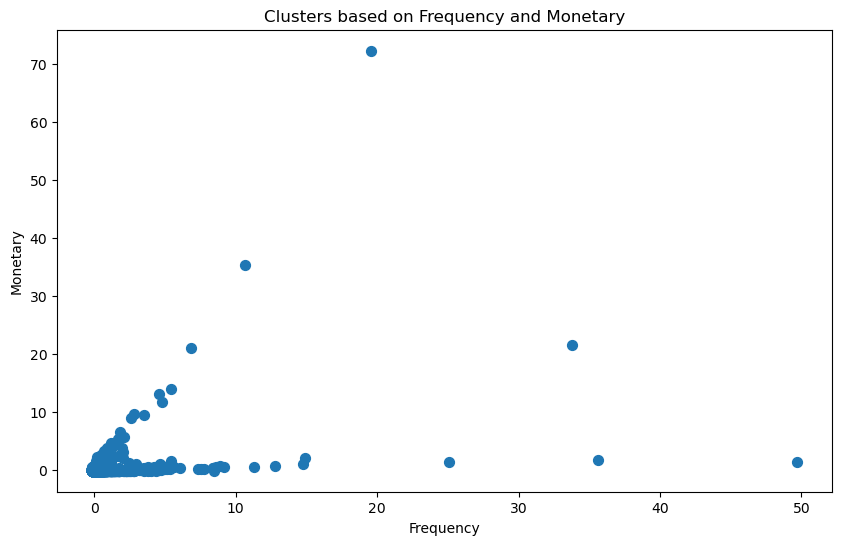

In [201]:
plt.figure(figsize=(10, 6))
plt.scatter(df_fm['Frequency'], df_fm_copy['Monetary'], s=50)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clusters based on Frequency and Monetary')
plt.show()

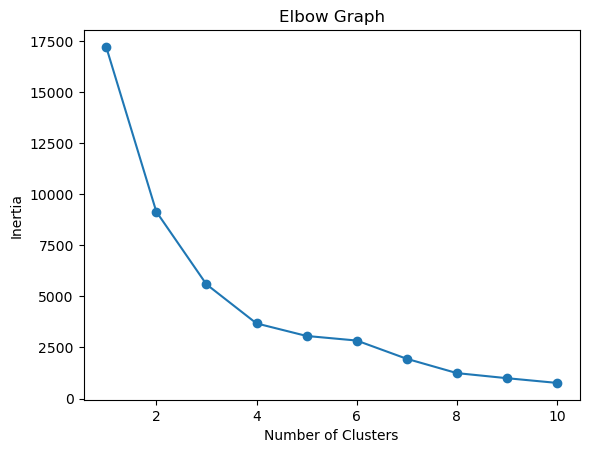

In [171]:
from sklearn.cluster import KMeans

data = df_fm[['Frequency','Monetary']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [173]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_fm['Cluster']=kmeans.fit_predict(data)
df_fm

,Merchant Name,Frequency,Monetary,Cluster
0,MRDIY,-0.135622,-0.057288,3
1,EVISTA,-0.135622,-0.057358,3
2,R&T,-0.062162,-0.057375,3
3,Raja sparepart,0.011298,-0.057249,3
4,SALING MEMBANTU,-0.135622,-0.057376,3
...,...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373,3
8605,yesi ftwi,-0.135622,-0.057341,3
8606,youreat - GSA,-0.135622,0.169841,3
8607,youwillceluller,-0.135622,-0.057361,3


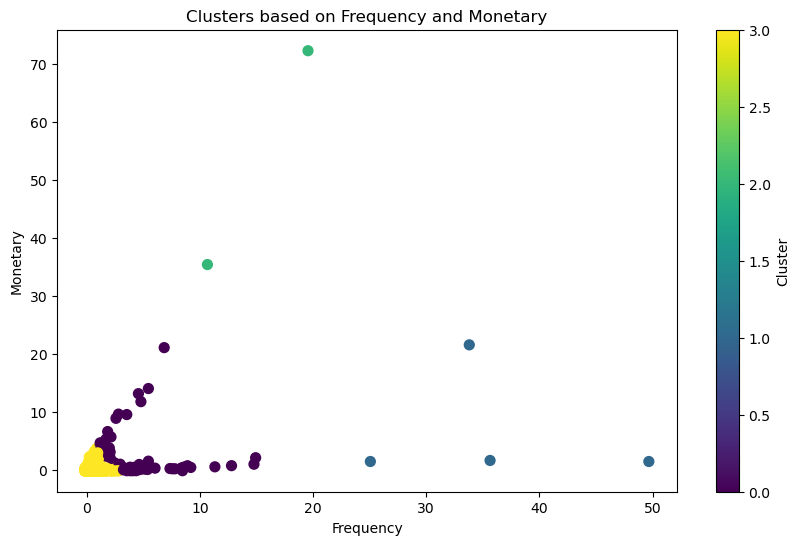

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(df_fm['Frequency'], df_fm_copy['Monetary'], c=df_fm['Cluster'], cmap='viridis', s=50)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clusters based on Frequency and Monetary')
plt.colorbar(label='Cluster')
plt.show()


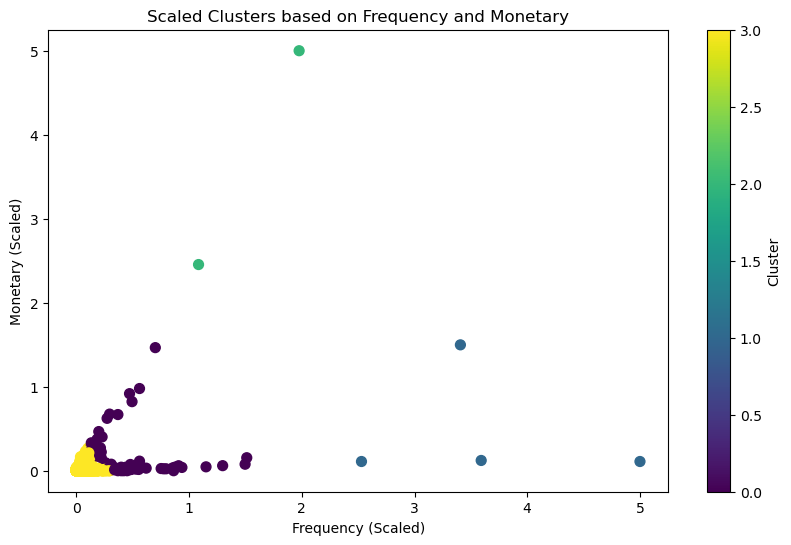

In [175]:
from sklearn.preprocessing import MinMaxScaler

df_fm_scaled = df_fm.copy()

scaler = MinMaxScaler(feature_range=(0, 5))

df_fm_scaled[['Frequency', 'Monetary']] = scaler.fit_transform(df_fm_scaled[['Frequency', 'Monetary']])

plt.figure(figsize=(10, 6))
plt.scatter(df_fm_scaled['Frequency'], df_fm_scaled['Monetary'], c=df_fm_scaled['Cluster'], cmap='viridis', s=50)
plt.xlabel('Frequency (Scaled)')
plt.ylabel('Monetary (Scaled)')
plt.title('Scaled Clusters based on Frequency and Monetary')
plt.colorbar(label='Cluster')
plt.show()

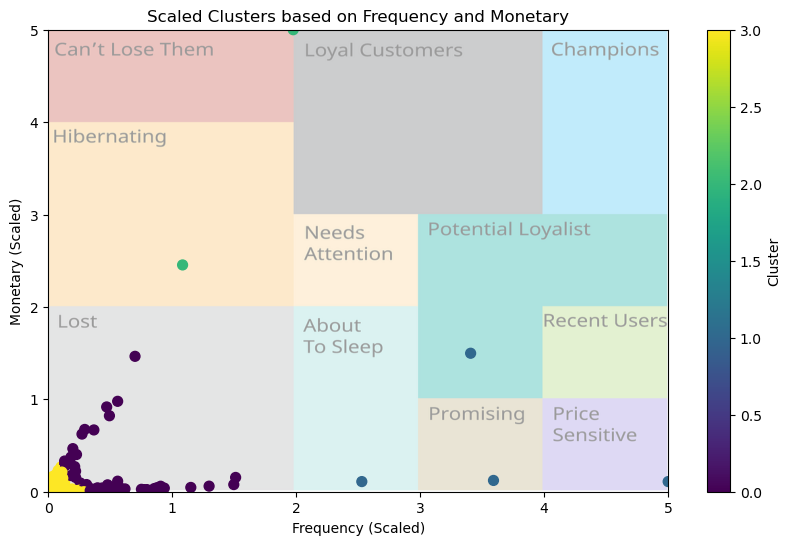

In [135]:
from matplotlib import pyplot as plt

background_image_path = r"C:\Users\ASUS\Downloads\tablerfm.png"
background_image = plt.imread(background_image_path)

fig, ax = plt.subplots(figsize=(10, 6))

ax.imshow(background_image, extent=[0, 5, 0, 5], aspect='auto', alpha =0.4)

scatter = ax.scatter(df_fm_scaled['Frequency'], df_fm_scaled['Monetary'], c=df_fm_scaled['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Frequency (Scaled)')
ax.set_ylabel('Monetary (Scaled)')
ax.set_title('Scaled Clusters based on Frequency and Monetary')

plt.colorbar(scatter, label='Cluster')

plt.show()

In [137]:
segments = {
    'Lost': ((-1, 2), (-1, 2)),
    'Hibernating': ((-1, 2), (2, 4)),
    'Can’t Lose Them': ((-1, 2), (4, 6)),
    'About to Sleep': ((2, 3), (-1, 2)),
    'Needs attention': ((2, 3), (2, 3)),
    'Loyal Customers': ((2, 4), (3, 6)),
    'Promising': ((3, 4), (-1, 1)),
    'Potential Loyalist': [((3, 4), (1, 3)), ((4, 6), (2, 3))],
    'Price Sensitive': ((4, 6), (-1, 1)),
    'Recent users': ((4, 6), (1, 2)),
    'Champions': ((4, 6), (3, 6))
}

def assign_segment(row):
    for segment, bounds in segments.items():
        if isinstance(bounds, list):
            for (x_range, y_range) in bounds:
                if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                    return segment
        else:
            x_range, y_range = bounds
            if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                return segment
    return 'Other'

df_fm_scaled['Segment'] = df_fm_scaled.apply(assign_segment, axis=1)

segment_stats = df_fm_scaled.groupby('Segment').agg({
    'Merchant Name': 'count',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

segment_stats.columns = ['Segment', 'Count', 'Average Frequency', 'Average Monetary']

total_customers = df_fm_scaled.shape[0]
segment_stats['Percentage'] = (segment_stats['Count'] / total_customers) * 100

for _, row in segment_stats.iterrows():
    segment = row['Segment']
    count = row['Count']
    percentage = row['Percentage']
    avg_frequency = row['Average Frequency']
    avg_monetary = row['Average Monetary']
    print(f"{segment}")
    print(f"There are {count} people in this group, which is {percentage:.2f}% of the total.")




About to Sleep
There are 1 people in this group, which is 0.01% of the total.
Can’t Lose Them
There are 1 people in this group, which is 0.01% of the total.
Hibernating
There are 1 people in this group, which is 0.01% of the total.
Lost
There are 8603 people in this group, which is 99.93% of the total.
Potential Loyalist
There are 1 people in this group, which is 0.01% of the total.
Price Sensitive
There are 1 people in this group, which is 0.01% of the total.
Promising
There are 1 people in this group, which is 0.01% of the total.


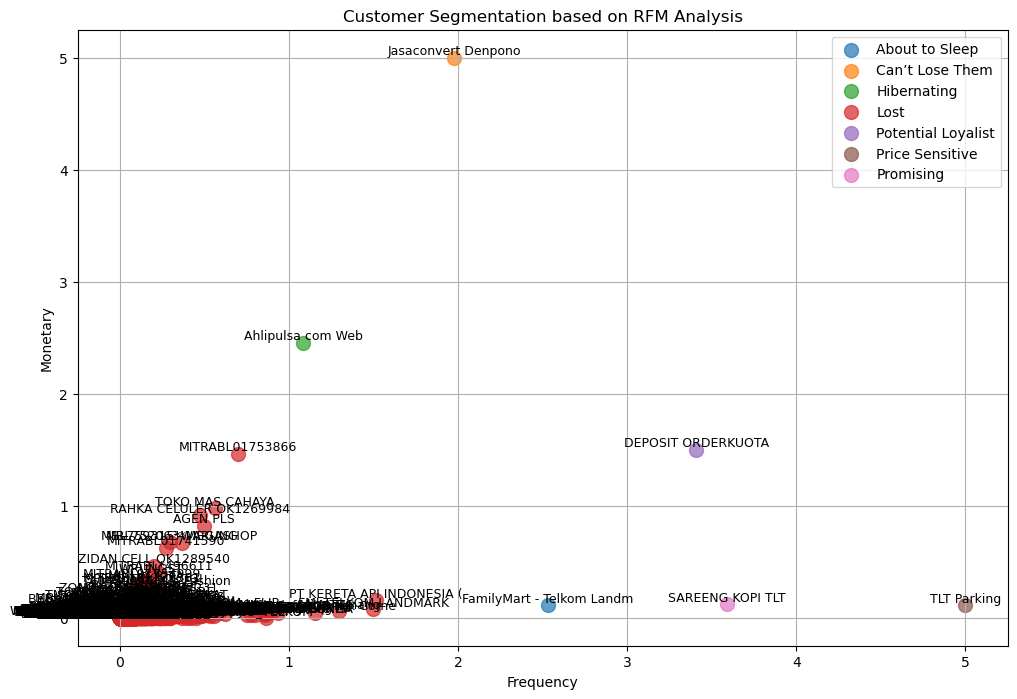

In [139]:
import matplotlib.pyplot as plt

def assign_segment(row):
    for segment, bounds in segments.items():
        if isinstance(bounds, list):
            for (x_range, y_range) in bounds:
                if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                    return segment
        else:
            x_range, y_range = bounds
            if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                return segment
    return 'Other'

df_fm_scaled['Segment'] = df_fm_scaled.apply(assign_segment, axis=1)

plt.figure(figsize=(12, 8))

for segment, group in df_fm_scaled.groupby('Segment'):
    plt.scatter(group['Frequency'], group['Monetary'], label=segment, s=100, alpha=0.7)

    for index, row in group.iterrows():
        plt.text(row['Frequency'], row['Monetary'], str(row['Merchant Name']), fontsize=9, ha='center', va='bottom')

plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation based on RFM Analysis')
plt.legend()
plt.grid(True)
plt.show()


In [140]:
df_fm

,Merchant Name,Frequency,Monetary,Cluster
0,MRDIY,-0.135622,-0.057288,3
1,EVISTA,-0.135622,-0.057358,3
2,R&T,-0.062162,-0.057375,3
3,Raja sparepart,0.011298,-0.057249,3
4,SALING MEMBANTU,-0.135622,-0.057376,3
...,...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373,3
8605,yesi ftwi,-0.135622,-0.057341,3
8606,youreat - GSA,-0.135622,0.169841,3
8607,youwillceluller,-0.135622,-0.057361,3


In [141]:
copy_df = df_fm.copy()
copy_df

,Merchant Name,Frequency,Monetary,Cluster
0,MRDIY,-0.135622,-0.057288,3
1,EVISTA,-0.135622,-0.057358,3
2,R&T,-0.062162,-0.057375,3
3,Raja sparepart,0.011298,-0.057249,3
4,SALING MEMBANTU,-0.135622,-0.057376,3
...,...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373,3
8605,yesi ftwi,-0.135622,-0.057341,3
8606,youreat - GSA,-0.135622,0.169841,3
8607,youwillceluller,-0.135622,-0.057361,3


In [142]:
copy_df['Cluster'].value_counts()

Cluster
3    8534
0      69
1       4
2       2
Name: count, dtype: int64

In [143]:
filtered_df = copy_df[copy_df['Cluster'] ==3]
filtered_df

,Merchant Name,Frequency,Monetary,Cluster
0,MRDIY,-0.135622,-0.057288,3
1,EVISTA,-0.135622,-0.057358,3
2,R&T,-0.062162,-0.057375,3
3,Raja sparepart,0.011298,-0.057249,3
4,SALING MEMBANTU,-0.135622,-0.057376,3
...,...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373,3
8605,yesi ftwi,-0.135622,-0.057341,3
8606,youreat - GSA,-0.135622,0.169841,3
8607,youwillceluller,-0.135622,-0.057361,3


In [144]:
filtered_df['Cluster'].value_counts()

Cluster
3    8534
Name: count, dtype: int64

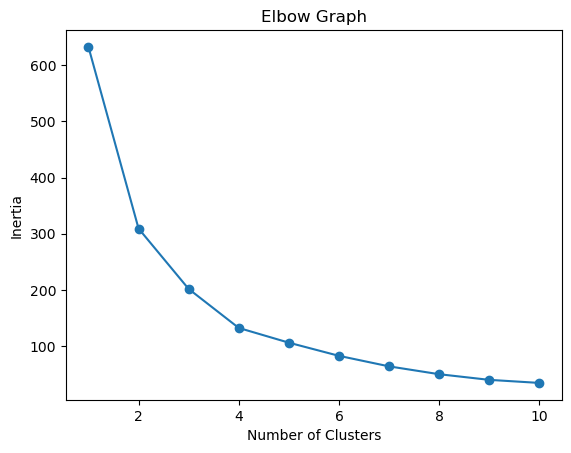

In [145]:
from sklearn.cluster import KMeans 

data = filtered_df[['Frequency','Monetary']]
inertias =[]

for i in range (1,11):
    kmeans = KMeans (n_clusters = i, random_state = 42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker ='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [146]:
kmeans = KMeans (n_clusters = 4, random_state=42)
filtered_df['Cluster']=kmeans.fit_predict(data)
filtered_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21844\1390798574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster']=kmeans.fit_predict(data)


,Merchant Name,Frequency,Monetary,Cluster
0,MRDIY,-0.135622,-0.057288,3
1,EVISTA,-0.135622,-0.057358,3
2,R&T,-0.062162,-0.057375,3
3,Raja sparepart,0.011298,-0.057249,3
4,SALING MEMBANTU,-0.135622,-0.057376,3
...,...,...,...,...
8604,wwwsmartfrencom,-0.135622,-0.057373,3
8605,yesi ftwi,-0.135622,-0.057341,3
8606,youreat - GSA,-0.135622,0.169841,3
8607,youwillceluller,-0.135622,-0.057361,3


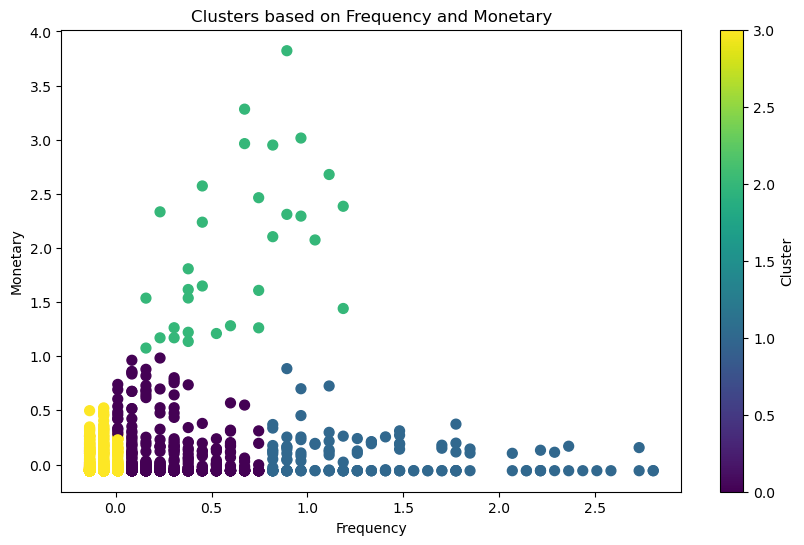

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Frequency'], filtered_df['Monetary'], c=filtered_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clusters based on Frequency and Monetary')
plt.colorbar(label='Cluster')
plt.show()


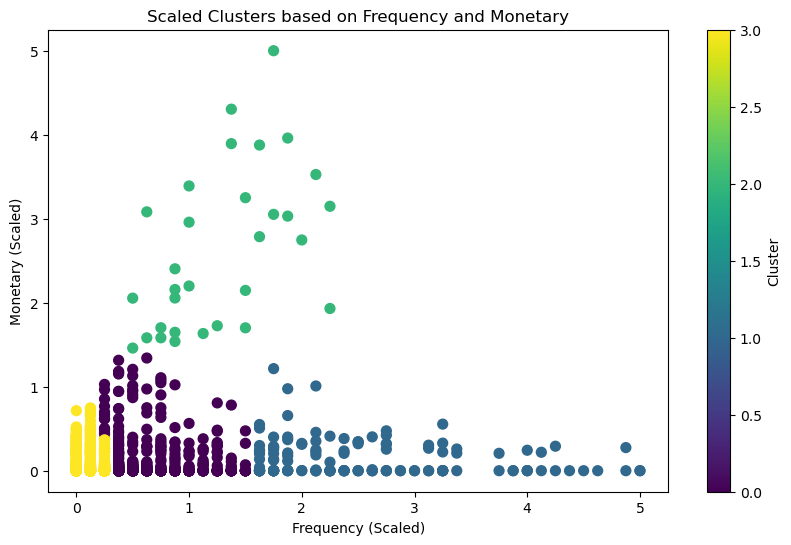

In [148]:
from sklearn.preprocessing import MinMaxScaler

filtered_df_scaled = filtered_df.copy()

scaler = MinMaxScaler(feature_range=(0, 5))

filtered_df_scaled[['Frequency', 'Monetary']] = scaler.fit_transform(filtered_df_scaled[['Frequency', 'Monetary']])

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_scaled['Frequency'], filtered_df_scaled['Monetary'], c=filtered_df_scaled['Cluster'], cmap='viridis', s=50)
plt.xlabel('Frequency (Scaled)')
plt.ylabel('Monetary (Scaled)')
plt.title('Scaled Clusters based on Frequency and Monetary')
plt.colorbar(label='Cluster')
plt.show()

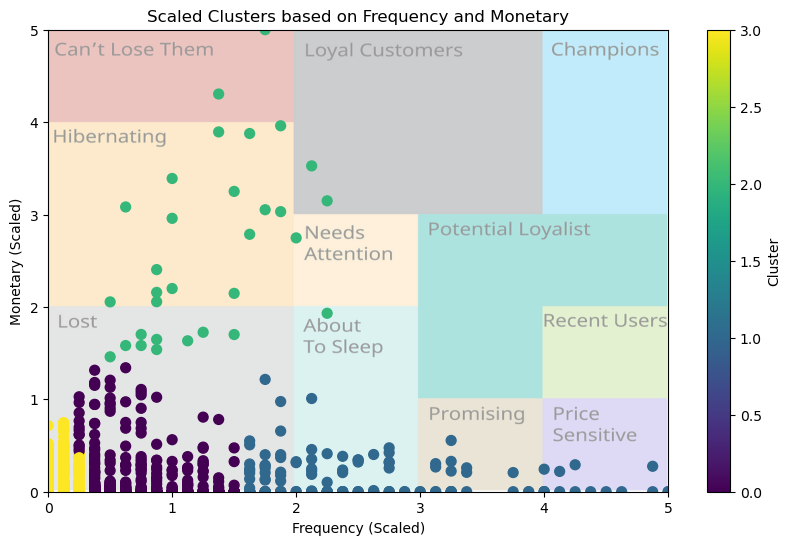

In [149]:
from matplotlib import pyplot as plt

background_image_path = r"C:\Users\ASUS\Downloads\tablerfm.png"
background_image = plt.imread(background_image_path)

fig, ax = plt.subplots(figsize=(10, 6))

ax.imshow(background_image, extent=[0, 5, 0, 5], aspect='auto', alpha =0.4)

scatter = ax.scatter(filtered_df_scaled['Frequency'], filtered_df_scaled['Monetary'], c=filtered_df_scaled['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Frequency (Scaled)')
ax.set_ylabel('Monetary (Scaled)')
ax.set_title('Scaled Clusters based on Frequency and Monetary')

plt.colorbar(scatter, label='Cluster')

plt.show()

In [150]:
segments = {
    'Lost': ((-1, 2), (-1, 2)),
    'Hibernating': ((-1, 2), (2, 4)),
    'Can’t Lose Them': ((-1, 2), (4, 6)),
    'About to Sleep': ((2, 3), (-1, 2)),
    'Needs attention': ((2, 3), (2, 3)),
    'Loyal Customers': ((2, 4), (3, 6)),
    'Promising': ((3, 4), (-1, 1)),
    'Potential Loyalist': [((3, 4), (1, 3)), ((4, 6), (2, 3))],
    'Price Sensitive': ((4, 6), (-1, 1)),
    'Recent users': ((4, 6), (1, 2)),
    'Champions': ((4, 6), (3, 6))
}

def assign_segment(row):
    for segment, bounds in segments.items():
        if isinstance(bounds, list):
            for (x_range, y_range) in bounds:
                if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                    return segment
        else:
            x_range, y_range = bounds
            if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                return segment
    return 'Other'

filtered_df_scaled['Segment'] = filtered_df_scaled.apply(assign_segment, axis=1)

segment_stats = filtered_df_scaled.groupby('Segment').agg({
    'Merchant Name': 'count',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

segment_stats.columns = ['Segment', 'Count', 'Average Frequency', 'Average Monetary']

total_customers = filtered_df_scaled.shape[0]
segment_stats['Percentage'] = (segment_stats['Count'] / total_customers) * 100

for _, row in segment_stats.iterrows():
    segment = row['Segment']
    count = row['Count']
    percentage = row['Percentage']
    avg_frequency = row['Average Frequency']
    avg_monetary = row['Average Monetary']
    print(f"{segment}")
    print(f"There are {count} people in this group, which is {percentage:.2f}% of the total.")




About to Sleep
There are 55 people in this group, which is 0.64% of the total.
Can’t Lose Them
There are 2 people in this group, which is 0.02% of the total.
Hibernating
There are 16 people in this group, which is 0.19% of the total.
Lost
There are 8424 people in this group, which is 98.71% of the total.
Loyal Customers
There are 2 people in this group, which is 0.02% of the total.
Needs attention
There are 1 people in this group, which is 0.01% of the total.
Price Sensitive
There are 11 people in this group, which is 0.13% of the total.
Promising
There are 23 people in this group, which is 0.27% of the total.


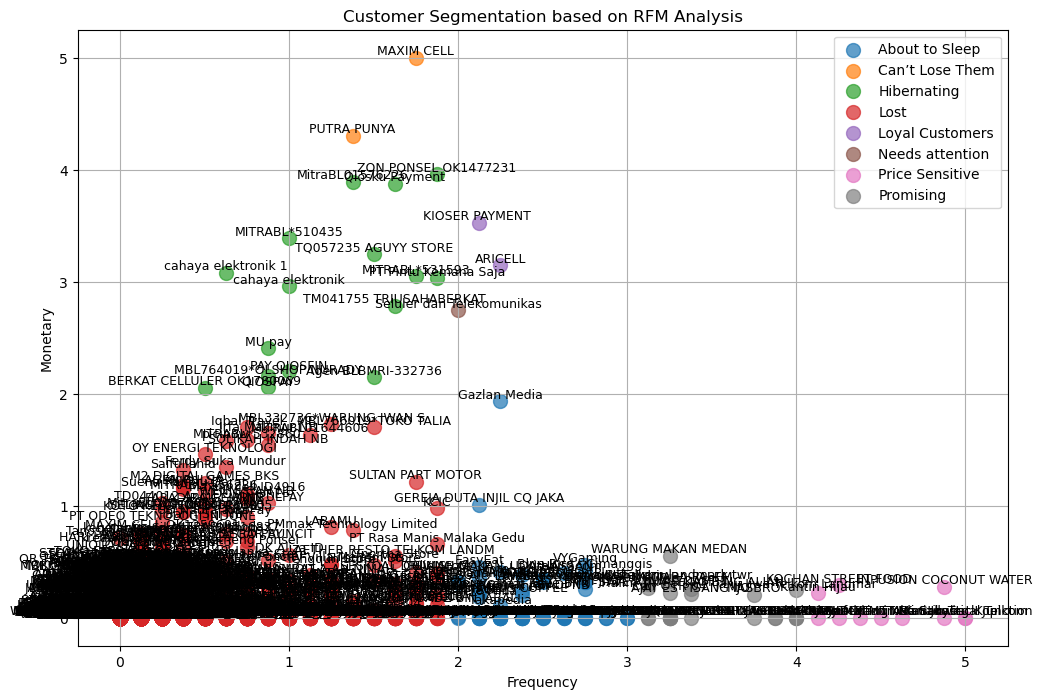

In [151]:
import matplotlib.pyplot as plt

def assign_segment(row):
    for segment, bounds in segments.items():
        if isinstance(bounds, list):
            for (x_range, y_range) in bounds:
                if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                    return segment
        else:
            x_range, y_range = bounds
            if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                return segment
    return 'Other'

filtered_df_scaled['Segment'] = filtered_df_scaled.apply(assign_segment, axis=1)

plt.figure(figsize=(12, 8))

for segment, group in filtered_df_scaled.groupby('Segment'):
    plt.scatter(group['Frequency'], group['Monetary'], label=segment, s=100, alpha=0.7)

    for index, row in group.iterrows():
        plt.text(row['Frequency'], row['Monetary'], str(row['Merchant Name']), fontsize=9, ha='center', va='bottom')

plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation based on RFM Analysis')
plt.legend()
plt.grid(True)
plt.show()


In [152]:
def assign_segment(row):
    for segment, bounds in segments.items():
        if isinstance(bounds, list):
            for (x_range, y_range) in bounds:
                if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                    return segment
        else:
            x_range, y_range = bounds
            if x_range[0] <= row['Frequency'] <= x_range[1] and y_range[0] <= row['Monetary'] <= y_range[1]:
                return segment
    return 'Other'

filtered_df_scaled['Segment'] = filtered_df_scaled.apply(assign_segment, axis=1)

for segment, group in filtered_df_scaled.groupby('Segment'):
    print(f"{segment}:")
    for merchant_name in group['Merchant Name']:
        print(f"-{merchant_name}")
    print("\n")


About to Sleep:
-ABHITECH17
-ANEKA KUE JADUL 1
-Arimida Comp
-Ayam Geprek Galau
-BAITULMAAL ANNIMAH
-Blue Bird - Cimanggis
-Blue Bird - Halim
-Blue Bird - Kramat Jati
-Blue Bird - Radin Inten
-Blue Bird - Warung Buncit
-C H E F I
-Calf OTR 10
-DKM AL HUDA
-EasyEat
-Es Kelapa Muda Berkah
-Es Tebu  Indonesia 2
-Es podeng
-Evi Cinta NB
-GEREJA DUTA INJIL CQ JAKA
-Gazlan Media
-Kitabisacom
-MASJID AL JADIID
-MASJID MANARUL ILMI ITS
-MOHAMMAD HAIRUDDIN
-MONETA PAY
-MTTG PEDULI
-NASI BEBEK GULE SAPI CAK
-NASI DANDIT
-NI NYOMAN ABADI NB
-Nasi Goreng & Roti Bakar
-PONDOK NDESO Mandiri
-PT BOT
-PT LIPPER SEJAHTERA INDON
-RIZK VIRTUAL VISTA
-RUMAH MAKAN_UDA HASSAN
-Rest Full Tuts
-SABA KOTA
-SAREENG KOPI TSO
-SATE MADURA BANG SAWER
-SATE PADANG AJO LAWEH
-SINAR SATRIA MANDIRI 8
-Siomay Parantina
-Sofyan Dewa Cahaya
-Soto Ayam Ambengan Cak-Di
-TAHU ACI AZKASYAKI TELKOM
-THE KEDEI
-TRINIL MAMON
-TULUS COFFEE
-Tadaima Bakehouse (Pluit)
-Takapedia
-VYGaming
-WARUNG KEPANJEN MBAK AMEL
-anaweb08
-hote